Здесь сравниваются 3 случая: плоская щетка с крышкой (surface and mirror(1 and 2)), две взаимопроникающие щетки, цилиндрическая пора: с НЕзаданной upperbound и с заданной (surface, mirror)

In [1]:
import sys
import os
sys.path.append('/home/tpopova/prj/PB_SCF')

from pore_utils import pore_utils
from py_utils.generate_pore_in_files import generate_pore_in_files
from py_utils.generate_flat_cap_in_files import generate_flat_cap_in_files
from py_utils.generate_two_flat_brushes import generate_two_flat_brush_in_files


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Условия

In [4]:
N = 300
S = 100
Cs = 0.001
alpha = 0.5
N_layers = 180

Одна щетка с крышкой, граничные условия: surface

In [5]:
file_name_pro_flat_cap_surface = generate_flat_cap_in_files(template_cap = '/home/tpopova/prj/PB_SCF/pore_templates/temp_surface.in',
                   
                   #название параметра
                   range_param = 'N_layers',
                   
                   type_lowerbound = 'surface',
                   
                   N_brush = N,
                   N_layers = N_layers,
                   S = S,
                   Cs = Cs,
                   alpha = alpha,
                   min_range_value = 4,
                   max_range_value = 4,
                   )

c_polymer_surface = np.asarray(pd.read_csv(file_name_pro_flat_cap_surface, sep='\t')['mol_brush_phi'])

ends_surface = np.asarray(pd.read_csv(file_name_pro_flat_cap_surface, sep='\t')['mon_G_phi'])
psi_surface = np.asarray(pd.read_csv(file_name_pro_flat_cap_surface, sep='\t')['sys_noname_psi'])

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 2.714567e+00 |g| = 8.260894e+00 alpha = 1.000000e+00 
hessian scaling: 2.02104
it =  1  E = 2.484205e+00 |g| = 7.610153e+00 alpha = 1.121052e-01 
it =  2  E = 2.615021e+00 |g| = 7.700053e+00 alpha = 9.680934e-02 
it =  3  E = 4.075903e+00 |g| = 7.141910e+00 alpha = 3.423256e-02 
it =  4  E = 4.723637e+00 |g| = 7.274854e+00 alpha = 2.431966e-02 
it =  5  E = 1.407053e+01 |g| = 7.546353e+00 alpha = 3.059863e-03 
it =  6  E = 5.074207e+00 |g| = 7.604708e+00 alpha = 2.211911e-02 
it =  7  E = 3.035366e+01 |g| = 7.643551e+00 alpha = 6.665047e-04 
it =  8  E = 1.279469e+01 |g| = 7.628126e+00 alpha = 3.491785e-03 
it =  9  E = 1.574951e+01 |g| = 7.590379e+00 alpha = 2.142220e-03 
it =  10  E = 1.068075e+01 |g| = 7.535779e+00

Одна щетка с крышкой, граничные условия: mirror

In [7]:
file_name_pro_flat_cap_mirror = generate_flat_cap_in_files(template_cap = '/home/tpopova/prj/PB_SCF/pore_templates/temp_surface.in',
                   
                   #название параметра
                   range_param = 'N_layers',
                   
                   type_lowerbound = 'mirror',
                   
                   N_brush = N,
                   N_layers = N_layers,
                   S = S,
                   Cs = Cs,
                   alpha = alpha,
                   min_range_value = 5,
                   max_range_value = 5,
                   )

c_polymer_mirror = np.asarray(pd.read_csv(file_name_pro_flat_cap_mirror, sep='\t')['mol_brush_phi'])

ends_mirror = np.asarray(pd.read_csv(file_name_pro_flat_cap_mirror, sep='\t')['mon_G_phi'])
psi_mirror = np.asarray(pd.read_csv(file_name_pro_flat_cap_mirror, sep='\t')['sys_noname_psi'])

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 2.714382e+00 |g| = 8.259877e+00 alpha = 1.000000e+00 
hessian scaling: 2.0218
it =  1  E = 2.484008e+00 |g| = 7.609047e+00 alpha = 1.121067e-01 
it =  2  E = 2.614009e+00 |g| = 7.698487e+00 alpha = 9.686449e-02 
it =  3  E = 4.075356e+00 |g| = 7.140218e+00 alpha = 3.423351e-02 
it =  4  E = 4.716519e+00 |g| = 7.273573e+00 alpha = 2.438888e-02 
it =  5  E = 1.393602e+01 |g| = 7.545404e+00 alpha = 3.118838e-03 
it =  6  E = 5.068490e+00 |g| = 7.603785e+00 alpha = 2.216645e-02 
it =  7  E = 2.977930e+01 |g| = 7.642595e+00 alpha = 6.923801e-04 
it =  8  E = 1.275214e+01 |g| = 7.627204e+00 alpha = 3.514719e-03 
it =  9  E = 1.585326e+01 |g| = 7.589447e+00 alpha = 2.114022e-03 
it =  10  E = 1.064497e+01 |g| = 7.534847e+00 

Две взаимопроникающие щетки

In [8]:
file_name_pro_two_brushes = generate_two_flat_brush_in_files(template_two = '/home/tpopova/prj/PB_SCF/pore_templates/two_flat_compress_temp.in',
                   
                   #название параметра
                   range_param = 'N_layers',
                   
                   N_brush_left = N,
                   N_brush_right = N,
                   N_layers = N_layers*2,
                   S_left = S,
                   S_right = S,
                   Cs = Cs,
                   alpha_left =alpha,
                   alpha_right = alpha,
                   min_range_value = 6,
                   max_range_value = 6,
                   )

c_polymer_right = np.asarray(pd.read_csv(file_name_pro_two_brushes, sep='\t')['mol_brushright_phi'])
c_polymer_left = np.asarray(pd.read_csv(file_name_pro_two_brushes, sep='\t')['mol_brushleft_phi'])

ends_right = np.asarray(pd.read_csv(file_name_pro_two_brushes, sep='\t')['mon_E_phi'])
ends_left = np.asarray(pd.read_csv(file_name_pro_two_brushes, sep='\t')['mon_G_phi'])

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 3.330171e+00 |g| = 1.201319e+01 alpha = 1.000000e+00 
hessian scaling: 1.22856
it =  1  E = 3.046940e+00 |g| = 1.106231e+01 alpha = 1.083242e-01 
it =  2  E = 4.341736e+00 |g| = 1.173417e+01 alpha = 5.346790e-02 
it =  3  E = 6.322181e+00 |g| = 1.124851e+01 alpha = 2.244910e-02 
it =  4  E = 1.109691e+01 |g| = 1.153235e+01 alpha = 7.979637e-03 
it =  5  E = 8.516172e+00 |g| = 1.173423e+01 alpha = 1.287569e-02 
it =  6  E = 9.165243e+00 |g| = 1.184837e+01 alpha = 1.058402e-02 
it =  7  E = 1.059911e+01 |g| = 1.216322e+01 alpha = 8.644215e-03 
it =  8  E = 1.830625e+01 |g| = 1.211778e+01 alpha = 3.068411e-03 
it =  9  E = 8.432809e+01 |g| = 1.190779e+01 alpha = 1.333810e-04 
it =  10  E = 9.600809e+00 |g| = 1.231239e+01

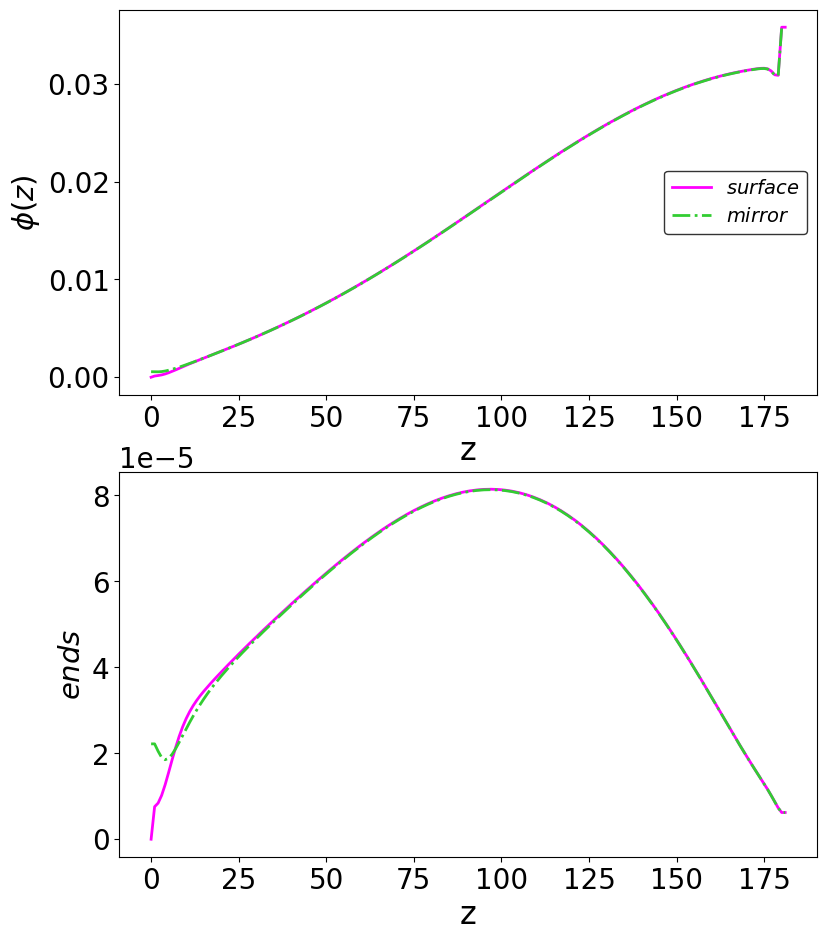

In [10]:
colors = ['fuchsia', 'blue', 'limegreen', 'orangered', 'orange', 'skyblue', 'slateblue', 'black', 'hotpink',
              'crimson', 'aquamarine']

fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(c_polymer_surface,
            linestyle='-',
            linewidth= 2,
            color='fuchsia',
            label=f'$surface$')

ax1.plot(c_polymer_mirror,
            linestyle='-.',
            linewidth= 2,
            color='limegreen',
            label=f'$mirror$')


# ax1.plot(c_polymer_left,
#             linestyle='--',
#             linewidth= 2,
#             color='slateblue',
#             label=f'$left \\ brush$')

# ax1.plot(c_polymer_right,
#             linestyle='--',
#             linewidth= 2,
#             color='skyblue',
#             label=f'$right \\ brush$')

ax2.plot(ends_surface,
            linestyle='-',
            linewidth= 2,
            color='fuchsia')

ax2.plot(ends_mirror,
            linestyle='-.',
            linewidth= 2,
            color='limegreen')

# ax2.plot(ends_left,
#             linestyle='--',
#             linewidth= 2,
#             color='slateblue')

# ax2.plot(ends_right,
#             linestyle='--',
#             linewidth= 2,
#             color='skyblue')

#  Добавляем подписи к осям:
ax1.set_xlabel('z',
                fontsize=23,  
                color='black', labelpad=2.5) 

ax1.set_ylabel(r'$\phi(z)$',
                fontsize=21, 
                color='black')
ax2.set_xlabel('z',
                fontsize=23, 
                color='black') 

ax2.set_ylabel('$ends$',
                fontsize=21,
                color='black') 

# legend
ax1.legend(
    fontsize=14,
            ncol=1,  # количество столбцов
            facecolor='white',  # цвет области
            edgecolor='black',  # цвет крайней линии
            title_fontsize='12',  # размер шрифта заголовка
            loc = 'center right')
# # legend
# ax2.legend(fontsize=16,
#             ncol=1,  # количество столбцов
#             facecolor='white',  # цвет области
#             edgecolor='black',  # цвет крайней линии   #  заголовок
#             title_fontsize='12', loc = 'upper right'  # размер шрифта заголовка
#             )

fig.set_figwidth(9)
fig.set_figheight(11)

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

plt.show()
# save = fig.savefig('Figure_2.png', dpi = 300)